In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

In [84]:
# Fashion MNIST
# Toy data set, created as only MNIST data set was there as a toy data set
# This has apperal images, not digits. Again 28 X 28 grey scale images
# Data set has 10 categories of apperals (0-T-shirt/top, 1-Trouser, 2-Pullover, 3-Dress,
# 4-Coat, 5-Sandal, 6-Shirt, 7-Sneaker, 8-Bag, 9-Ankle boot)
# 60,000 training samples and 10,000 test samples

In [85]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [86]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


2


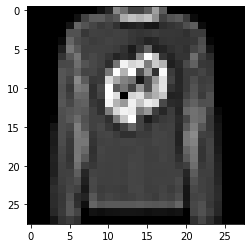

In [87]:
num = 123
plt.imshow(x_train[num], cmap="gray")
print(y_train[num])

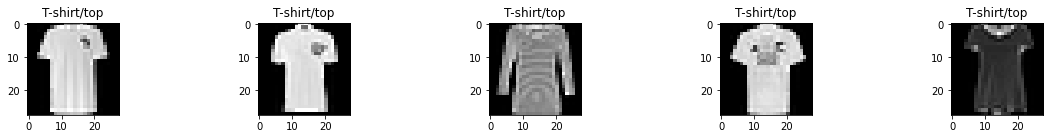

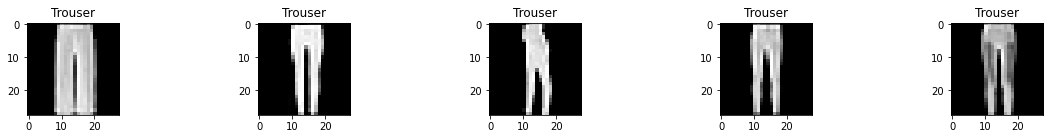

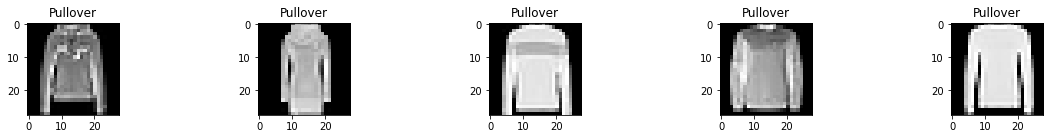

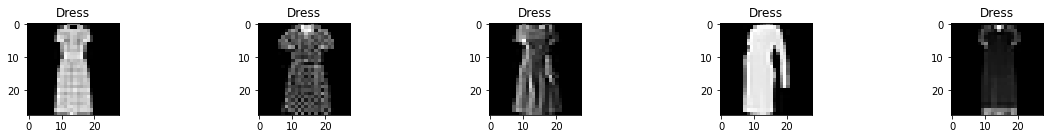

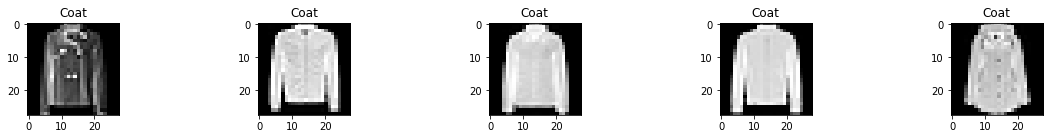

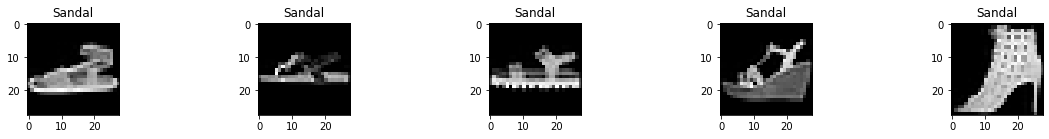

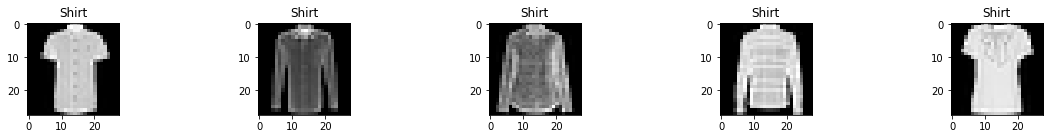

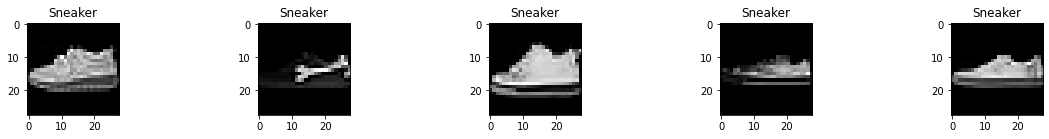

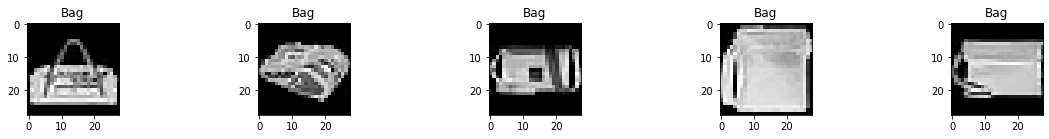

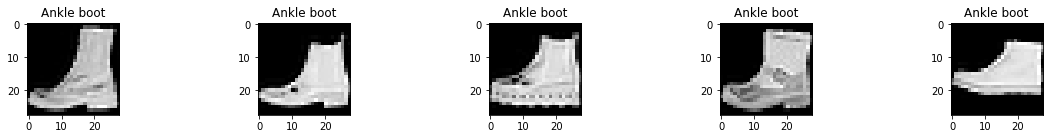

In [89]:
num_of_images = 5
categories = {0:"T-shirt/top", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat", 
              5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle boot"}

len_cat = len(categories)
for cat in range(len_cat):
    indexes = np.random.choice(np.where(y_train == cat)[0], num_of_images)
    plt.figure(figsize=(20,20))
    for col in range(num_of_images):
        plt.subplot(len_cat, num_of_images, num_of_images*cat+col+1)
        plt.title(categories[cat])
        plt.imshow(x_train[indexes[col]], cmap="gray")

In [45]:
# Pre process the input images
# Scaling
x_train = x_train/255.0

# Pre process the output actual
# One hot encoding (used in error calculations) 
y_train = tf.keras.utils.to_categorical(y_train)
y_train.shape

(60000, 10)

In [59]:
# Make the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input((28,28), name="Input"))
model.add(tf.keras.layers.Flatten(name="Flatten"))
model.add(tf.keras.layers.Dense(100, activation=tf.keras.activations.relu, 
                                name="Hidden"))
model.add(tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax,
                                name="Output"))

In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Hidden (Dense)              (None, 100)               78500     
                                                                 
 Output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, 
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), metrics=["acc"])

In [62]:
model_history = model.fit(x_train, y_train, epochs=30, validation_split=0.1, batch_size=32)
# Another advantage of using batch size is that only batch size number of images will be loaded into the RAM at a time
# If unspecified batch_size will default to 32
# Hence the number of batches per epoch in this case is 54000/32 = 1687.5 = 1688. 54000 is the training data size 
# after validation split 
# With batch size this is more of Mini-Batch Gradient Descent instead of Stochastic Gradient Descent
# For pure SDG batch_size should be 1

Epoch 1/30
1688/1688 [==============================] - 2s 1ms/step - loss: 0.7818 - acc: 0.7442 - val_loss: 0.5583 - val_acc: 0.8087
Epoch 2/30
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5291 - acc: 0.8207 - val_loss: 0.4920 - val_acc: 0.8267
Epoch 3/30
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4803 - acc: 0.8355 - val_loss: 0.4599 - val_acc: 0.8358
Epoch 4/30
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4535 - acc: 0.8433 - val_loss: 0.4490 - val_acc: 0.8443
Epoch 5/30
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4354 - acc: 0.8479 - val_loss: 0.4329 - val_acc: 0.8480
Epoch 6/30
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4217 - acc: 0.8525 - val_loss: 0.4213 - val_acc: 0.8520
Epoch 7/30
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4095 - acc: 0.8569 - val_loss: 0.4087 - val_acc: 0.8545
Epoch 8/30
1688/1688 [==============================] - 2s 1ms

In [58]:
# To adject the parameters and re-train the model, we have to change the parameters and re-run the entire model
# not just re-run the fit. If we just run the fit it starts from where it stopped in the previous run
# Hence delete the model (del model), re-construct the model and train the model with the new parameters
# del model

In [63]:
# Keras stores the results after epoch and returns all the results on completing fit
model_history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

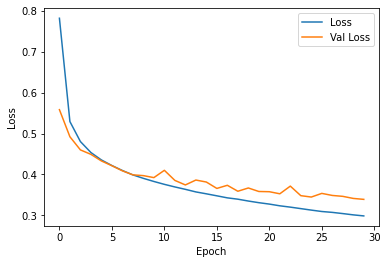

In [68]:
plt.plot(model_history.history["loss"], label="Loss")
plt.plot(model_history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [ ]:
# After 20 epoch the validation loss is no longer reducing like the loss
# If the loss is decreasing but validation loss is increasing after some epochs, then the model is over fitting the
# train data. We have to stop at minimum validation loss

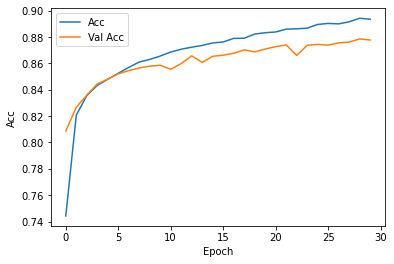

In [69]:
plt.plot(model_history.history["acc"], label="Acc")
plt.plot(model_history.history["val_acc"], label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend()

In [70]:
model.input_shape # number 0f images * width * height
# None here means we can give any number of images, 1 or many, it is going to predict

(None, 28, 28)

(28, 28)

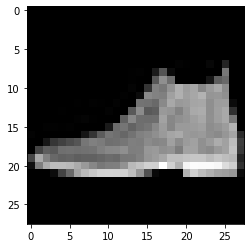

In [74]:
sample_image = x_test[0]
plt.imshow(sample_image, cmap="gray")
sample_image.shape

In [78]:
# Since its shape is 28 x 28 we cannot give it to the model directly, we have add a 1 (number of images)   the 
# beginning to make it compatable with the model input shape
sample_image = np.expand_dims(sample_image, 0)
sample_image = sample_image/255.0

In [80]:
results = model.predict(sample_image)
np.round(results, 2)

1/1 [==============================] - 0s 29ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.08, 0.  , 0.87]],
      dtype=float32)

In [81]:
# Find the index where propability is maximum
np.argmax(results)

9